In [1]:
include("../src/Coefplots.jl")
using .Coefplots
# using Coefplots
using FixedEffectModels
using DataFrames
using Random

Random.seed!(1234)

MersenneTwister(1234)

In [2]:
N = 100 # 100 individuals
T = 20 # 20 periods
event_time = 8 # make the third period be the event time
id = repeat(1:N, inner=T) # generate id
is_treated = id .< N/2 # make first half of individuals are treated, last half of indivuduals are controls
time = repeat(1:T, outer=N) .- event_time # generate time
treatment = repeat(rand(N), inner=T) .* is_treated # generate treatment, 0 if obs are controls
outcome = treatment .* (time .> 0) + id + time .+ rand(N*T) # generate outcome, treatment only have an effect after event time
# use face value of id, time as FE, also add a noise.

df = DataFrame(id = id, time = time, outcome = outcome, treatment = treatment)

,id,time,outcome,treatment
,Int64,Int64,Float64,Float64
1,1,-7,-5.46783,0.590845
2,1,-6,-4.25593,0.590845
3,1,-5,-3.82579,0.590845
4,1,-4,-2.39046,0.590845
5,1,-3,-1.41889,0.590845
6,1,-2,-0.53814,0.590845
7,1,-1,0.854807,0.590845
8,1,0,1.64796,0.590845
9,1,1,3.37571,0.590845


In [3]:
res = reg(df, @formula(outcome ~ time&treatment + fe(id) + fe(time)); contrasts = Dict(:time => DummyCoding(base=0)))

                               Fixed Effect Model                               
Number of obs:                     2000   Degrees of freedom:                 139
R2:                               1.000   R2 Adjusted:                      1.000
F-Stat:                         29.3497   p-value:                          0.000
R2 within:                        0.231   Iterations:                           2
outcome              |  Estimate Std.Error  t value Pr(>|t|)  Lower 95% Upper 95%
---------------------------------------------------------------------------------
time: -7 & treatment | 0.0495207  0.130428 0.379679    0.704  -0.206279  0.305321
time: -6 & treatment | 0.0166465  0.130428  0.12763    0.898  -0.239154  0.272447
time: -5 & treatment | 0.0427165  0.130428 0.327511    0.743  -0.213084  0.298517
time: -4 & treatment |  0.258609  0.130428  1.98277    0.048 0.00280869  0.514409
time: -3 & treatment |  0.165605  0.130428  1.26971    0.204 -0.0901948  0.421405
time: -2 & treatm

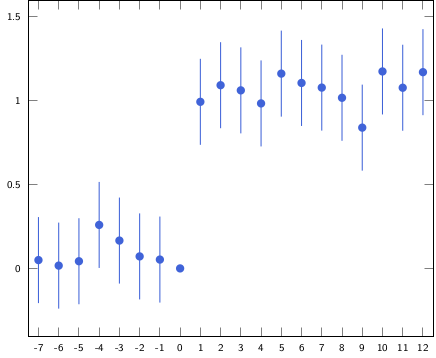

In [4]:
esplot(res; normalized_period = 0)

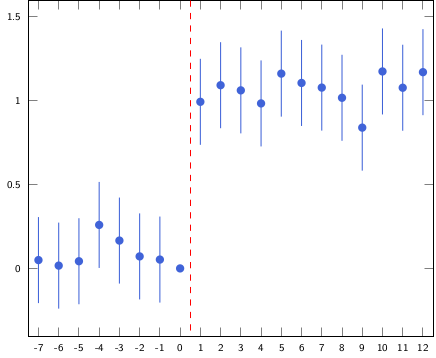

In [7]:
using PGFPlotsX
es_plot = esparse(res; normalized_period = 0)
addcomponent!(es_plot, @pgf VLine({red, dashed},event_time+0.5)) # add a vertical line red dashed line
plot(es_plot)